In [1]:
# Install packages
import sys
!{sys.executable} -m pip install pandas matplotlib seaborn

In [2]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read in data
# low memory=false is to allow coumns with mixed datatypes
data = pd.read_csv('/home/freegeek/Downloads/LendingClub_Data.csv', low_memory=False)

In [4]:
# look at data
# set_option is to see all columns
pd.set_option('display.max_columns', None)


# Display the first few rows of the data
print(data.head())

# Get the DataFrame shape
print(data.shape)

# Display a concise summary of the data
print(data.info())

# Get basic statistical details
print(data.describe(include='all'))

# Check for missing values
print(data.isnull().sum())



        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_st

In [5]:
# drop columns I'm not interested in
columns_to_drop = [
    'url', 'id', 'member_id', 'desc', 'title', 'emp_title', 
    'open_il_6m', 'open_il_12m', 'open_il_24m', 'max_bal_bc', 
    'total_cu_tl', 'il_util', 'creditPullD', 'reviewStatusD', 
    'acceptD', 'expD', 'ils_exp_d', 'listD', 'num_tl_120dpd_2m', 
    'num_tl_30dpd', 'zip_code', 'msa', 'reviewStatus', 'addr_state',
    'issue_d'
]
cleaned_data = data.drop(columns=columns_to_drop, errors='ignore')
cleaned_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,all_util,total_rev_hi_lim,inq_fi,inq_last_12m
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,other,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# filter out target loans
target_loans = cleaned_data[cleaned_data['loan_status'].isin(['Charged Off', 'Defaulted'])]
target_loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,all_util,total_rev_hi_lim,inq_fi,inq_last_12m
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Charged Off,n,small_business,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210.0,32.6,13.0,f,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-2012,152.39,NaN,Aug-2012,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Charged Off,n,other,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279.0,36.5,3.0,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-2012,121.45,NaN,Mar-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,9000.0,9000.0,9000.0,36 months,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,debt_consolidation,10.08,0.0,Apr-2004,1.0,NaN,NaN,4.0,0.0,10452.0,91.7,9.0,f,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-2012,305.38,NaN,Nov-2012,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,10000.0,10000.0,10000.0,36 months,10.65,325.74,B,B2,3 years,RENT,100000.0,Source Verified,Charged Off,n,other,7.06,0.0,May-1991,2.0,NaN,NaN,14.0,0.0,11997.0,55.5,29.0,f,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Oct-2013,325.74,NaN,Mar-2014,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#filter out non target loans
non_target_loans = cleaned_data[cleaned_data['loan_status'].isin(['Fully Paid Off', 'Current', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'])]
non_target_loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,mths_since_rcnt_il,total_bal_il,open_rv_12m,open_rv_24m,all_util,total_rev_hi_lim,inq_fi,inq_last_12m
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,n,other,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Current,n,debt_consolidation,23.51,0.0,Jul-2005,1.0,NaN,NaN,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0,Jan-2016,170.08,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,10000.0,10000.0,9975.0,60 months,15.96,242.97,C,C5,2 years,RENT,29120.0,Verified,Current,n,debt_consolidation,22.83,0.0,Feb-1997,1.0,68.0,NaN,11.0,0.0,16158.0,63.6,31.0,f,2695.31,2688.53,11622.36,11593.40,7304.67,4317.69,0.0,0.0,0.0,Jan-2016,242.97,Jan-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,12500.0,12500.0,12475.0,60 months,12.69,282.44,B,B5,1 year,RENT,27000.0,Verified,Current,n,debt_consolidation,16.04,0.0,Dec-2001,3.0,NaN,NaN,6.0,0.0,10143.0,50.0,24.0,f,3193.13,3186.72,13506.54,13479.58,9306.87,4199.67,0.0,0.0,0.0,Jan-2016,282.44,Jan-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,17500.0,8950.0,8925.0,60 months,17.27,223.74,D,D3,6 years,RENT,40000.0,Verified,Current,n,small_business,19.47,0.0,May-2006,1.0,NaN,NaN,5.0,0.0,10724.0,58.9,6.0,f,2462.25,2455.34,10713.52,10683.65,6487.75,4225.77,0.0,0.0,0.0,Jan-2016,223.74,Jan-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# summary statistics for loan amount of target loans
print(target_loans['loan_amnt'].describe())
print(non_target_loans['loan_amnt'].describe())

count    45248.000000
mean     14556.293096
std       8393.421467
min        900.000000
25%       8000.000000
50%      12675.000000
75%      20000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
count    621980.000000
mean      15257.286328
std        8500.857615
min        1000.000000
25%        8875.000000
50%       14000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64


In [9]:
# count length of loan for target loans
print(target_loans['term'].value_counts())

term
36 months    29083
60 months    16165
Name: count, dtype: int64


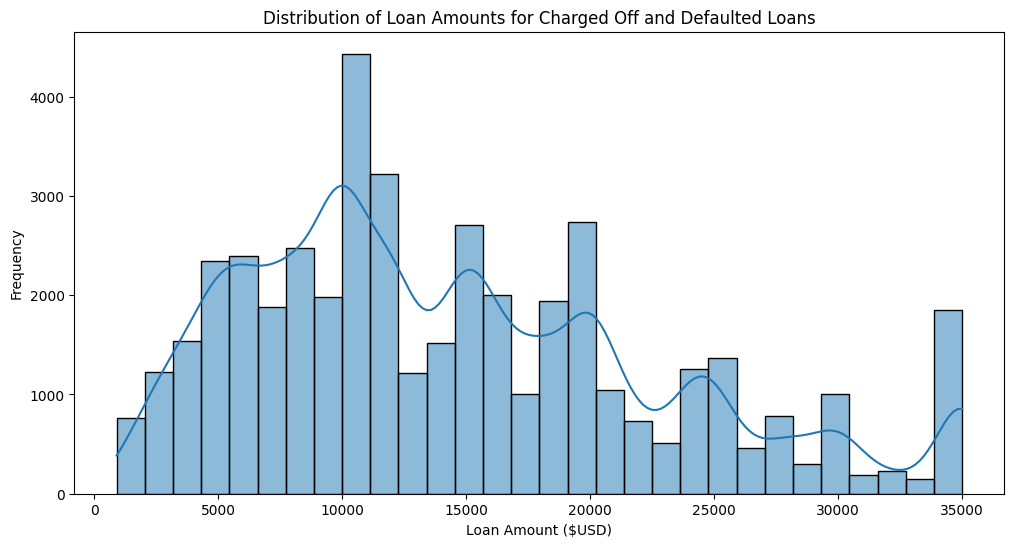

In [10]:
# Distribution of loan amounts for target loans
plt.figure(figsize=(12, 6))
sns.histplot(target_loans['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amounts for Charged Off and Defaulted Loans')
plt.xlabel('Loan Amount ($USD)')
plt.ylabel('Frequency')
plt.show()

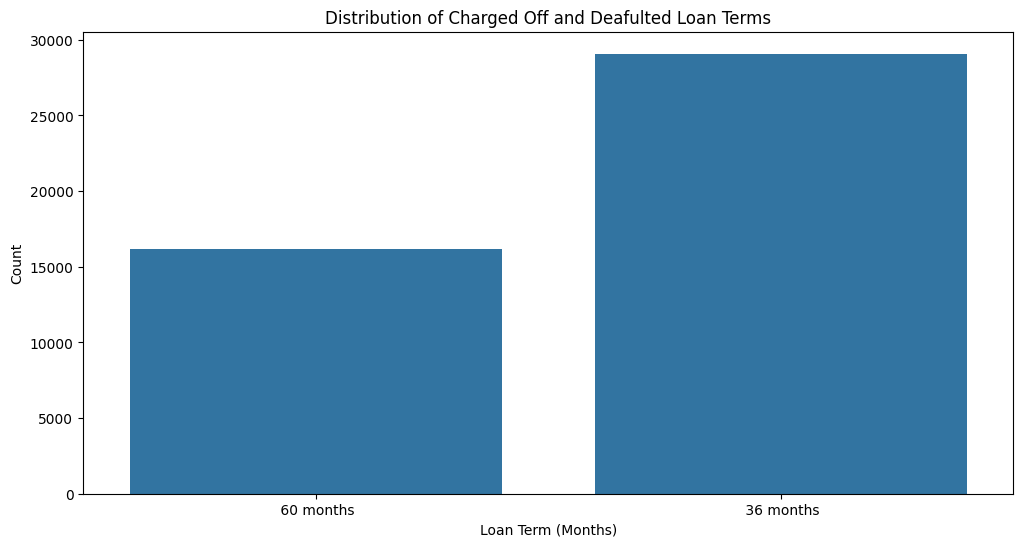

In [11]:
# Distribution of loan terms for target loans
plt.figure(figsize=(12, 6))
sns.countplot(x='term', data=target_loans)
plt.title('Distribution of Charged Off and Deafulted Loan Terms')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Count')
plt.show()

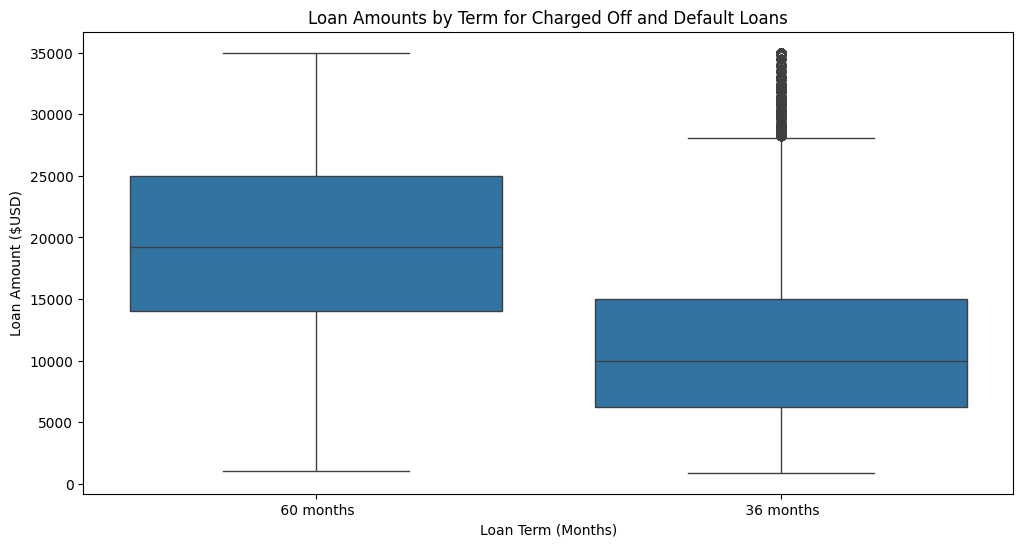

In [12]:
# Boxplot to see distribution of loan amounts by loan term for target loans
plt.figure(figsize=(12, 6))
sns.boxplot(x='term', y='loan_amnt', data=target_loans)
plt.title('Loan Amounts by Term for Charged Off and Default Loans')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Loan Amount ($USD)')
plt.show()

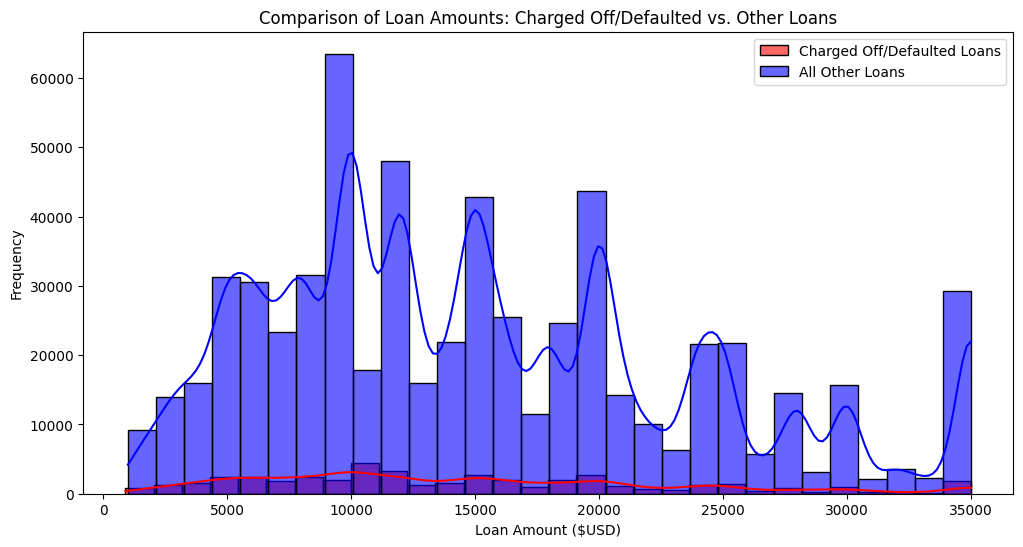

In [13]:
# compare distribution fo loan amounts for target vs non target loans
plt.figure(figsize=(12, 6))
sns.histplot(target_loans['loan_amnt'], color="red", label="Charged Off/Defaulted Loans", bins=30, kde=True, alpha=0.6)
sns.histplot(non_target_loans['loan_amnt'], color="blue", label="All Other Loans", bins=30, kde=True, alpha=0.6)

plt.title('Comparison of Loan Amounts: Charged Off/Defaulted vs. Other Loans')
plt.xlabel('Loan Amount ($USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

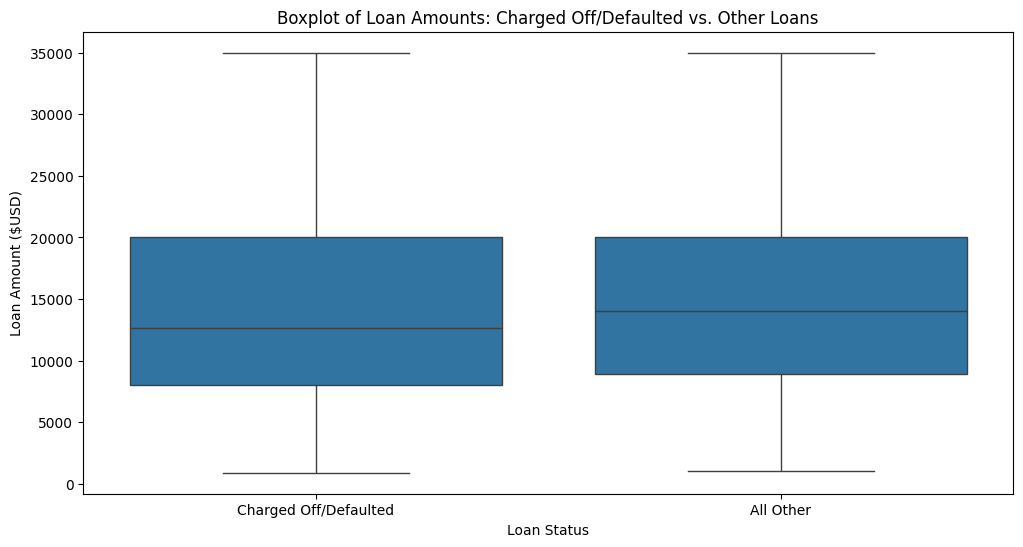

In [14]:
# Create a combined dataframe
combined_loans = pd.concat([target_loans.assign(Type='Charged Off/Defaulted'), non_target_loans.assign(Type='All Other')])

#boox plot of loan amounts for different loans
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='loan_amnt', data=combined_loans)
plt.title('Boxplot of Loan Amounts: Charged Off/Defaulted vs. Other Loans')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($USD)')
plt.show()

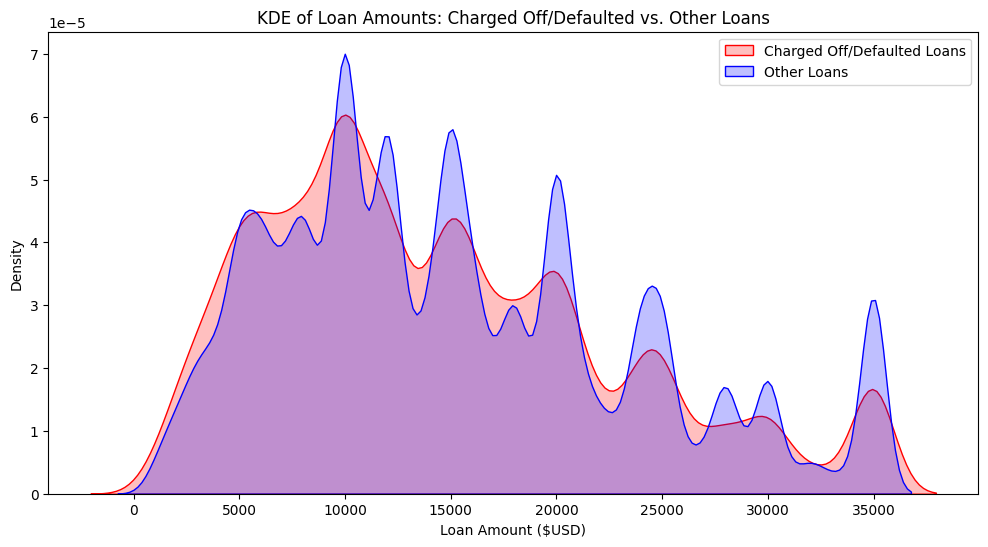

In [15]:
# KDE graph: Kernel Density Estimation plot shows the density of loans, not count, but they are very similar.
plt.figure(figsize=(12, 6))
sns.kdeplot(target_loans['loan_amnt'], color="red", label="Charged Off/Defaulted Loans", fill=True)
sns.kdeplot(non_target_loans['loan_amnt'], color="blue", label="Other Loans", fill=True)

plt.title('KDE of Loan Amounts: Charged Off/Defaulted vs. Other Loans')
plt.xlabel('Loan Amount ($USD)')
plt.ylabel('Density')
plt.legend()
plt.show()

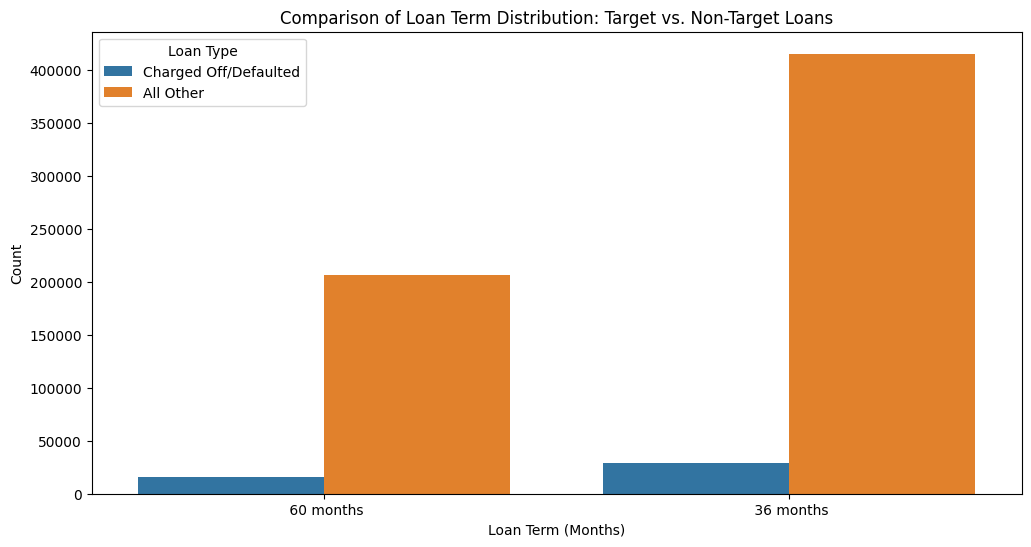

In [16]:
# bar plot of terms for different loans
plt.figure(figsize=(12, 6))
sns.countplot(x='term', hue='Type', data=combined_loans)
plt.title('Comparison of Loan Term Distribution: Target vs. Non-Target Loans')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Count')
plt.legend(title='Loan Type')
plt.show()

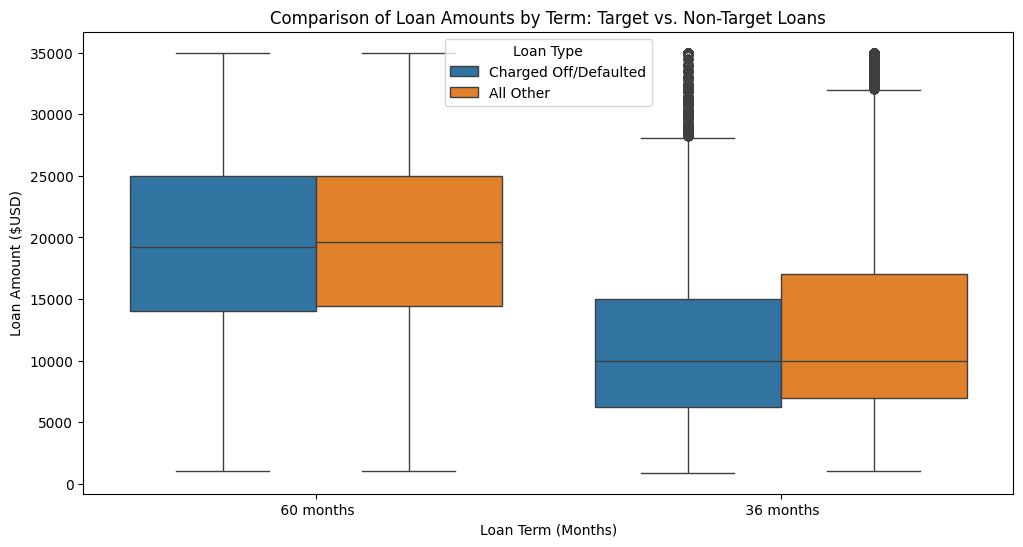

In [17]:
#box plot of loan amounts and terms by different loans
plt.figure(figsize=(12, 6))
sns.boxplot(x='term', y='loan_amnt', hue='Type', data=combined_loans)
plt.title('Comparison of Loan Amounts by Term: Target vs. Non-Target Loans')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Loan Amount ($USD)')
plt.legend(title='Loan Type')
plt.show()


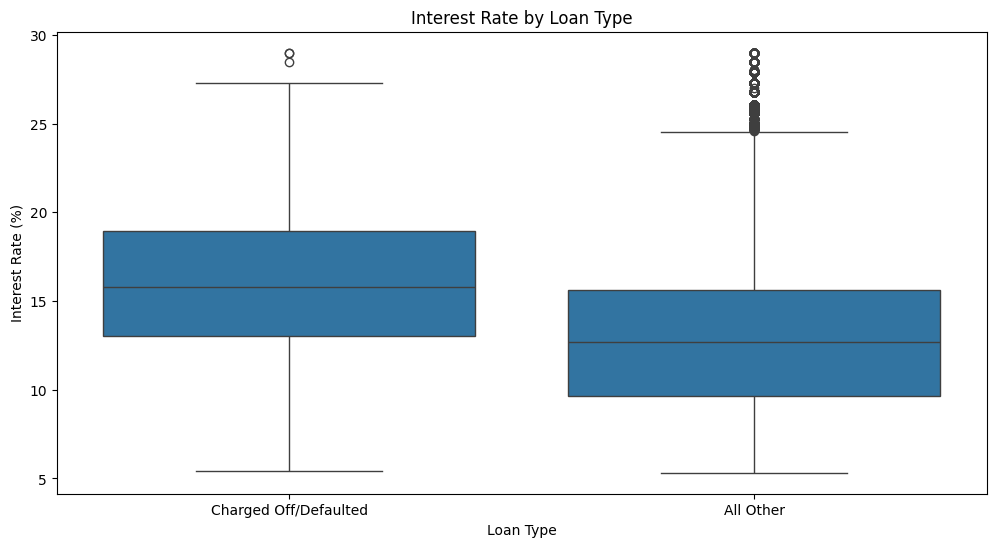

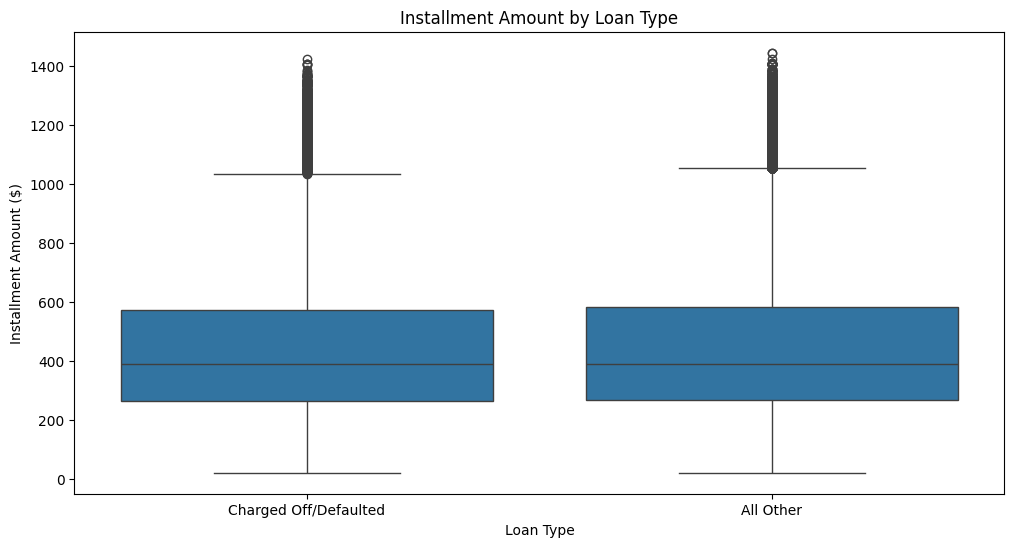

In [18]:
# Interest Rate
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='int_rate', data=combined_loans)
plt.title('Interest Rate by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Interest Rate (%)')
plt.show()

# Installment
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='installment', data=combined_loans)
plt.title('Installment Amount by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Installment Amount ($)')
plt.show()

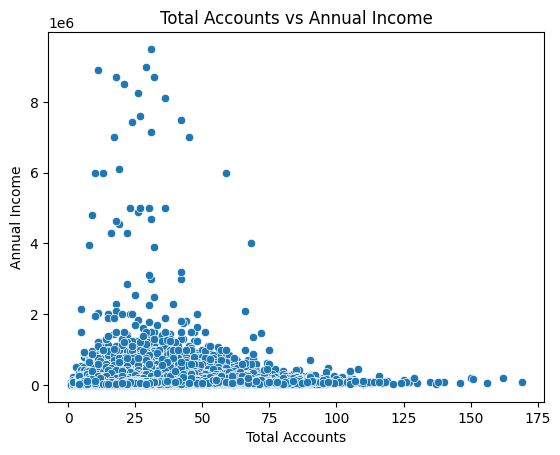

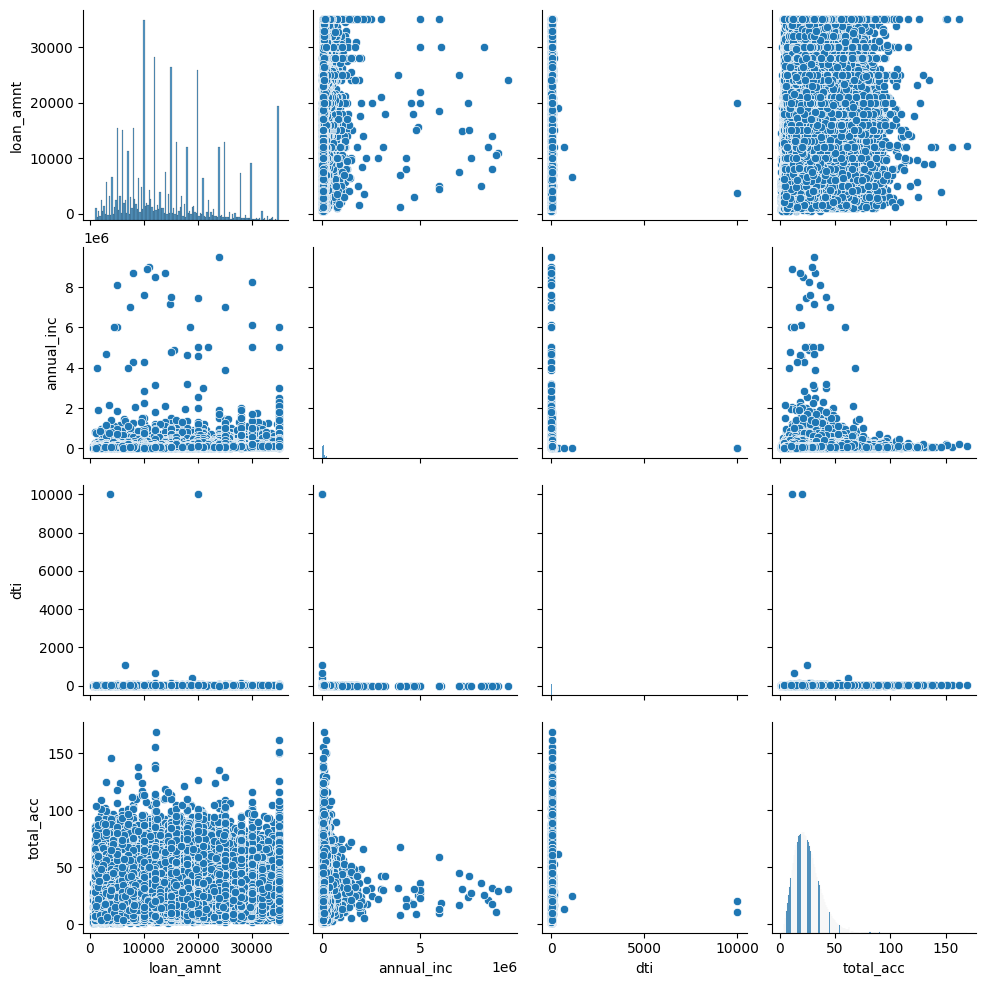

In [19]:
# Scatter plot to examine the relationship between two variables
sns.scatterplot(x='total_acc', y='annual_inc', data=data)
plt.title('Total Accounts vs Annual Income')
plt.xlabel('Total Accounts')
plt.ylabel('Annual Income')
plt.show()

# Pair plot of selected features
sns.pairplot(data[['loan_amnt', 'annual_inc', 'dti', 'total_acc']])
plt.show()


In [20]:
#Separate
charged_off_loans = data[data['loan_status'] == 'Charged Off']
defaulted_loans = data[data['loan_status'] == 'Defaulted']
#summary statisitcs
print(charged_off_loans.describe())
print(defaulted_loans.describe())


                 id     member_id     loan_amnt   funded_amnt  \
count  4.524800e+04  4.524800e+04  45248.000000  45248.000000   
mean   1.099321e+07  1.228375e+07  14556.293096  14510.749094   
std    1.196370e+07  1.279851e+07   8393.421467   8366.823080   
min    5.716700e+04  8.035300e+04    900.000000    900.000000   
25%    1.568882e+06  1.824480e+06   8000.000000   8000.000000   
50%    6.581844e+06  8.047168e+06  12675.000000  12600.000000   
75%    1.502167e+07  1.674259e+07  20000.000000  20000.000000   
max    6.051698e+07  6.453775e+07  35000.000000  35000.000000   

       funded_amnt_inv      int_rate   installment    annual_inc  \
count     45248.000000  45248.000000  45248.000000  4.524800e+04   
mean      14390.422897     16.015850    440.787464  6.508513e+04   
std        8391.872213      4.303637    247.012035  5.697144e+04   
min           0.000000      5.420000     21.620000  4.080000e+03   
25%        8000.000000     13.050000    265.175000  4.000000e+04   
50%   

In [21]:
#cross tabe status and purpose
pd.crosstab(data['loan_status'], data['grade'])
pd.crosstab(data['loan_status'], data['purpose'])


purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,448,7826,27599,56,2269,286,874,569,425,2936,54,1371,270,265
Current,4937,149835,356239,1,34980,1854,10308,5324,3121,26607,282,5020,2946,325
Default,10,233,790,0,47,7,14,15,11,65,0,19,8,0
Does not meet the credit policy. Status:Charged Off,13,69,292,32,71,11,23,22,15,121,1,72,6,13
Does not meet the credit policy. Status:Fully Paid,51,271,808,65,143,33,100,36,31,303,2,89,13,43
Fully Paid,3198,42250,120764,269,12660,1366,5391,2285,1603,11341,213,3375,1318,1690
In Grace Period,40,1150,3998,0,367,37,125,56,43,310,8,79,37,3
Issued,81,2071,4796,0,493,37,184,91,52,480,6,112,57,0
Late (16-30 days),15,381,1510,0,137,15,51,17,23,136,0,50,22,0


In [22]:

#cross tab status and term
pd.crosstab(data['loan_status'], data['term'])


term,36 months,60 months
loan_status,,
Charged Off,29083,16165
Current,402848,198931
Default,715,504
Does not meet the credit policy. Status:Charged Off,649,112
Does not meet the credit policy. Status:Fully Paid,1789,199
Fully Paid,167575,40148
In Grace Period,3975,2278
Issued,5982,2478
Late (16-30 days),1483,874


In [23]:
# count for dataframe
default_count = data[data['loan_status'] == 'Default'].shape[0]
charged_off_count = data[data['loan_status'] == 'Charged Off'].shape[0]

(default_count, charged_off_count)

(1219, 45248)

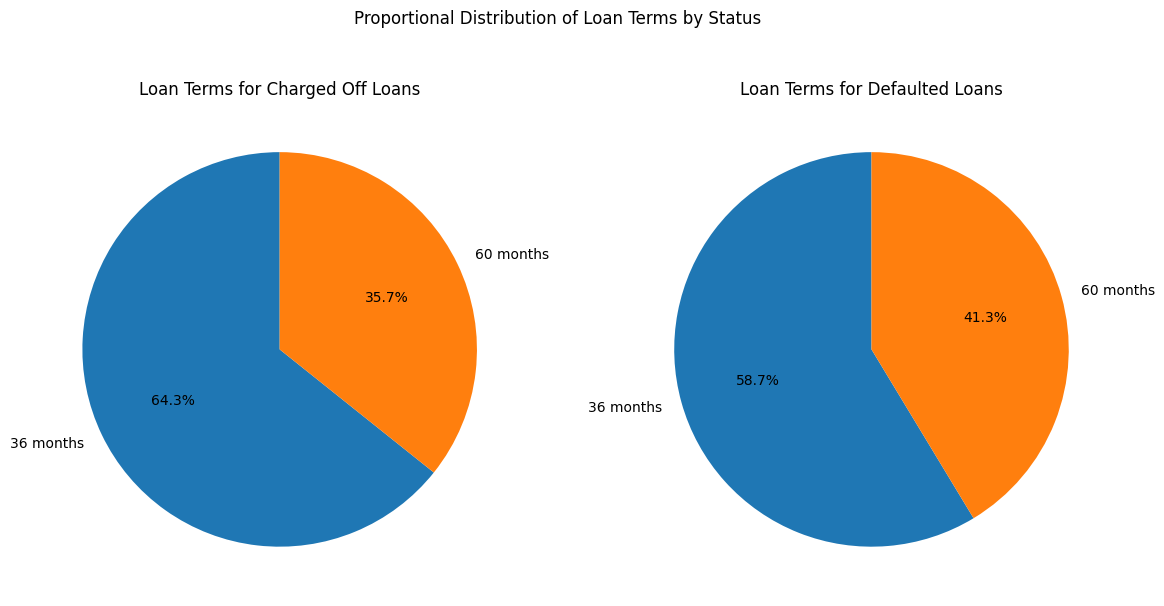

In [24]:
# Create dataframe
df = {
    'term': ['36 months', '36 months', '60 months', '60 months'],
    'Type': ['Charged Off', 'Defaulted', 'Charged Off', 'Defaulted'],
    'Count': [29083, 715, 16165, 504]
}
#create pivot table
combined_loans = pd.DataFrame(df)
combined_loans = combined_loans.pivot_table(index='term', columns='Type', values='Count', fill_value=0)

# Create the figure and axes objects
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for 'Charged Off' loans
axes[0].pie(combined_loans['Charged Off'], labels=combined_loans.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Loan Terms for Charged Off Loans')

# Pie chart for 'Defaulted' loans
axes[1].pie(combined_loans['Defaulted'], labels=combined_loans.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Loan Terms for Defaulted Loans')

plt.suptitle('Proportional Distribution of Loan Terms by Status')
plt.show()

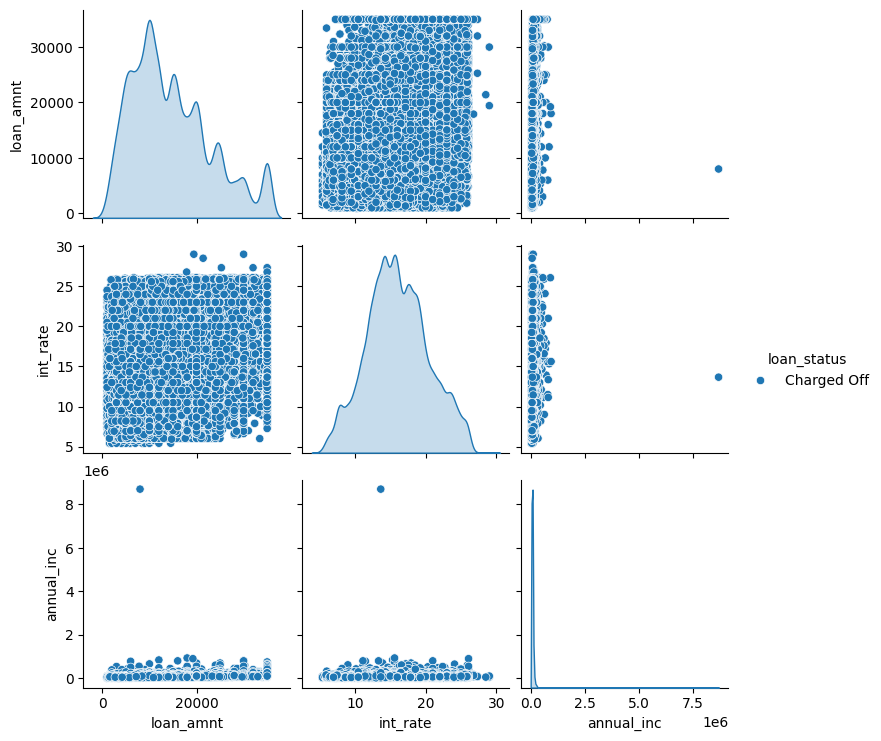

In [25]:
#pairplot1 
sns.pairplot(data[data['loan_status'].isin(['Charged Off', 'Defaulted'])], hue='loan_status', vars=['loan_amnt', 'int_rate', 'annual_inc'])


In [26]:
#cross tab status and grade
pd.crosstab(data['loan_status'], data['grade'])

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,2617,9519,12642,10486,6258,2934,792
Current,103322,171735,171175,91984,47061,13589,2913
Default,47,198,360,312,201,79,22
Does not meet the credit policy. Status:Charged Off,8,85,148,197,158,93,72
Does not meet the credit policy. Status:Fully Paid,90,269,481,494,378,154,122
Fully Paid,39679,66546,52678,30020,12928,4726,1146
In Grace Period,365,1240,1887,1405,908,354,94
Issued,1448,2529,2472,1185,593,194,39
Late (16-30 days),134,410,678,569,368,155,43


In [27]:
# count nulls
total_nulls = data.isnull().sum().sum()

total_nulls

17998493

In [28]:
# Calculate the number of null values per column
null_counts = data.isnull().sum()

# Sort the columns based on the number of null values in descending order
sorted_null_counts = null_counts.sort_values(ascending=False)
# display all rows 
pd.set_option('display.max_rows', None)
# Print counts
print(sorted_null_counts)

dti_joint                      886870
annual_inc_joint               886868
verification_status_joint      886868
il_util                        868762
mths_since_rcnt_il             866569
open_acc_6m                    866007
open_il_6m                     866007
open_il_12m                    866007
open_il_24m                    866007
total_bal_il                   866007
inq_last_12m                   866007
open_rv_12m                    866007
open_rv_24m                    866007
max_bal_bc                     866007
all_util                       866007
inq_fi                         866007
total_cu_tl                    866007
desc                           761353
mths_since_last_record         750326
mths_since_last_major_derog    665676
mths_since_last_delinq         454312
next_pymnt_d                   252971
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
emp_title                       51462
emp_length  

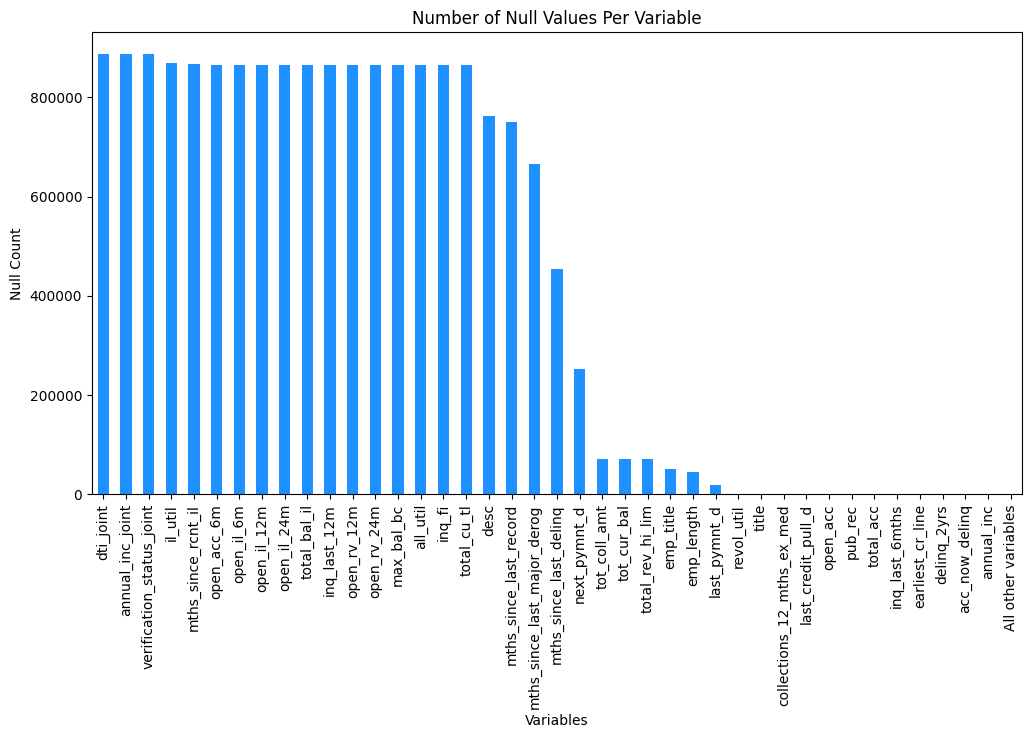

In [29]:

# Create a new null_counts
modified_null_counts = sorted_null_counts.copy()

# Sum all the zero-null columns into one entry
zero_nulls_sum = modified_null_counts[modified_null_counts == 0].sum()
modified_null_counts = modified_null_counts[modified_null_counts > 0]

# Add the aggregated 'All other variables'
modified_null_counts['All other variables'] = zero_nulls_sum

# bar plot for null values
modified_null_counts.plot(kind='bar', figsize=(12, 6), color='dodgerblue')
plt.title('Number of Null Values Per Variable')
plt.xlabel('Variables')
plt.ylabel('Null Count')
plt.show()

/tmp/ipykernel_30972/509324182.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/freegeek/Documents/Untitled1.csv')
/tmp/ipykernel_30972/509324182.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_cleaned['term'] = loan_data_cleaned['term'].str.strip()
/tmp/ipykernel_30972/509324182.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_cleaned['term'] = loan_data_cleaned['term'].replace('36 mont', '36 mont

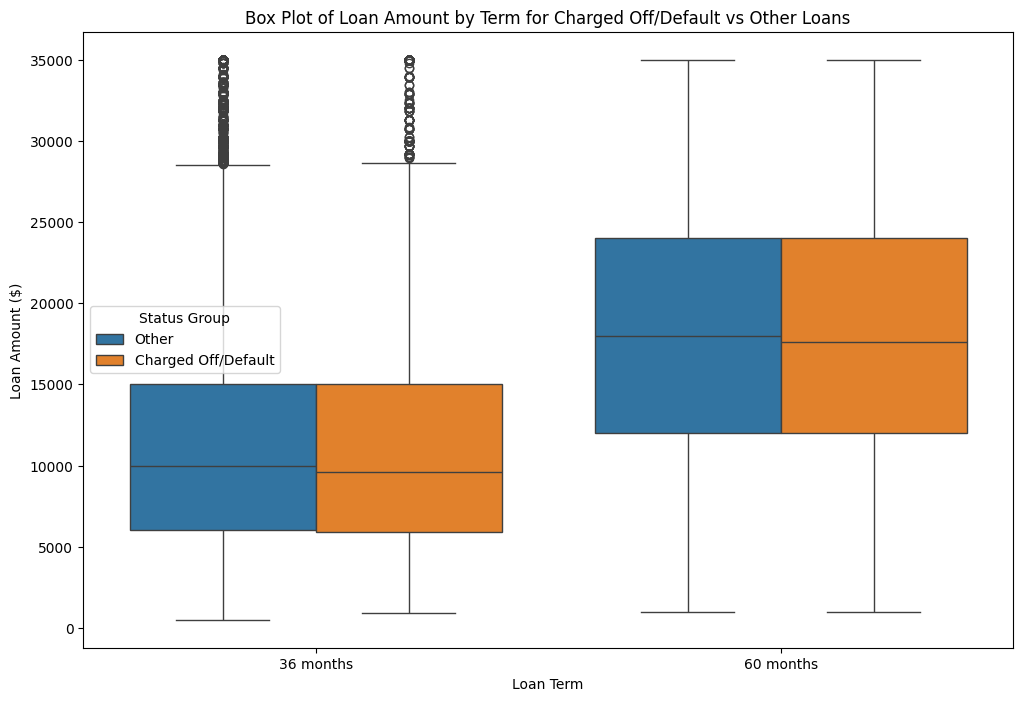

In [30]:
# Load cleaned data
df = pd.read_csv('/home/freegeek/Documents/Untitled1.csv')

# Drop unnecessary columns
loan_data_cleaned = df[['loan_amnt', 'term', 'loan_status']]

# clean term
loan_data_cleaned['term'] = loan_data_cleaned['term'].str.strip()

# Check for unique values 
unique_terms = loan_data_cleaned['term'].unique()
unique_statuses = loan_data_cleaned['loan_status'].unique()

unique_terms, unique_statuses

# Correct the typo in 'term'
loan_data_cleaned['term'] = loan_data_cleaned['term'].replace('36 mont', '36 months')

# Filter loan_status to only include common statuses
relevant_statuses = ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
                     'Does not meet the credit policy. Status:Fully Paid', 
                     'Does not meet the credit policy. Status:Charged Off']
loan_data_cleaned = loan_data_cleaned[loan_data_cleaned['loan_status'].isin(relevant_statuses)]

# Merge statuses into a single category
loan_data_cleaned['status_group'] = loan_data_cleaned['loan_status'].apply(
    lambda x: 'Charged Off/Default' if x in ['Charged Off', 'Default'] else 'Other')

# Check data for corrections
loan_data_cleaned['term'].unique(), loan_data_cleaned['status_group'].unique()


# Convert loan_amnt to numeric, handle any conversion errors by changing to NaN
loan_data_cleaned['loan_amnt'] = pd.to_numeric(loan_data_cleaned['loan_amnt'], errors='coerce')

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='term', y='loan_amnt', hue='status_group', data=loan_data_cleaned)
plt.title('Box Plot of Loan Amount by Term for Charged Off/Default vs Other Loans')
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount ($)')
plt.legend(title='Status Group')
plt.show()

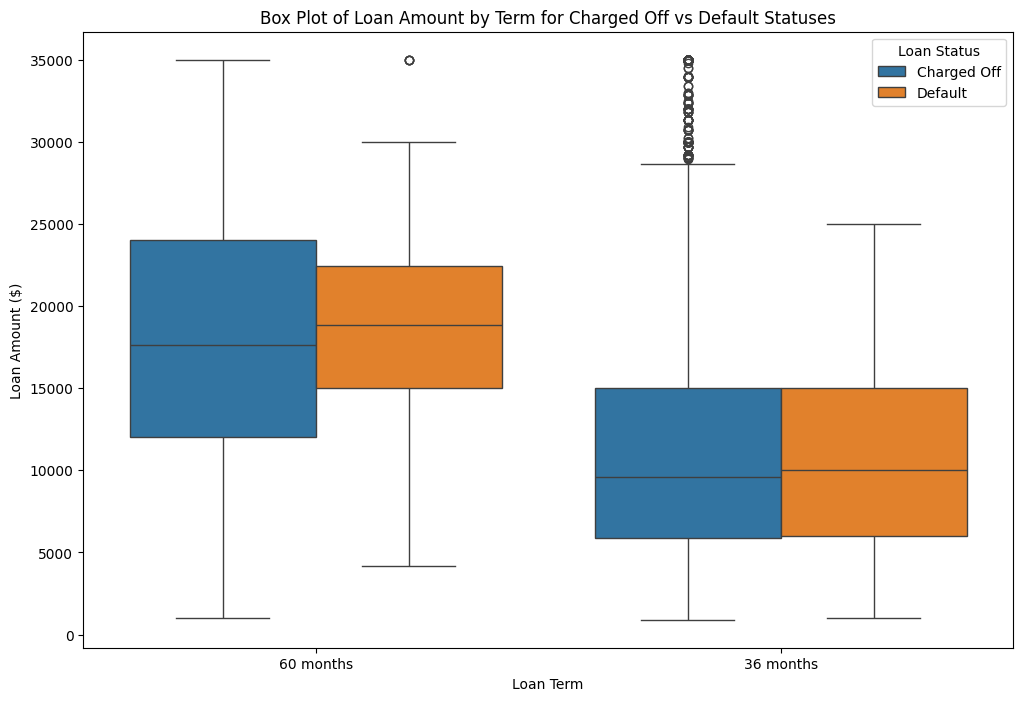

In [31]:
# Filter to only include 'Charged Off' and 'Default'
charged_default_data = loan_data_cleaned[loan_data_cleaned['loan_status'].isin(['Charged Off', 'Default'])]

# Create the box plot for just 'Charged Off' vs 'Default'
plt.figure(figsize=(12, 8))
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=charged_default_data)
plt.title('Box Plot of Loan Amount by Term for Charged Off vs Default Statuses')
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount ($)')
plt.legend(title='Loan Status')
plt.show()
